# 4. 라이브러리
## 4.3. MatplotLib 라이브러리
### 4.3.1. 데이터 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# air_quality_no2_long.csv
air_quality = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv")

In [7]:
air_quality['city'].value_counts()

Paris        1004
London        969
Antwerpen      95
Name: city, dtype: int64

In [8]:
# date.utc 열을 date time 형식으로 변환
air_quality['date.utc'] = pd.to_datetime(air_quality['date.utc'])

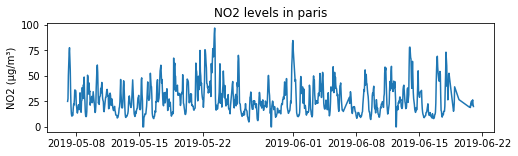

In [20]:
# 선 그래프
# 1) Paris의 NO2 농도 변화
paris = air_quality[air_quality['city'] == "Paris"]

plt.figure(figsize=(8,2))    # 사이즈 조절 가능
plt.title("NO2 levels in paris")
plt.plot(paris['date.utc'], paris['value'])
# plt.xlable("Date")
plt.ylabel("NO2 (µg/m³)")
# plt.tight_layout()
plt.show() # 밑에 외계어 안 뜨게 하려면


In [28]:
# 2) 리샘플링(1시간 -> 일간)
value_day = paris.set_index('date.utc')['value'].resample('D').mean()
value_day

date.utc
2019-05-07 00:00:00+00:00    33.986957
2019-05-08 00:00:00+00:00    25.012500
2019-05-09 00:00:00+00:00    27.795833
2019-05-10 00:00:00+00:00    32.854167
2019-05-11 00:00:00+00:00    26.804762
2019-05-12 00:00:00+00:00    18.108333
2019-05-13 00:00:00+00:00    21.662500
2019-05-14 00:00:00+00:00    22.804167
2019-05-15 00:00:00+00:00    20.800000
2019-05-16 00:00:00+00:00    23.930435
2019-05-17 00:00:00+00:00    35.437500
2019-05-18 00:00:00+00:00    27.045833
2019-05-19 00:00:00+00:00    32.733333
2019-05-20 00:00:00+00:00    26.920833
2019-05-21 00:00:00+00:00    38.950000
2019-05-22 00:00:00+00:00    43.054167
2019-05-23 00:00:00+00:00    46.404167
2019-05-24 00:00:00+00:00    29.195833
2019-05-25 00:00:00+00:00    32.090476
2019-05-26 00:00:00+00:00    19.200000
2019-05-27 00:00:00+00:00    19.850000
2019-05-28 00:00:00+00:00    20.020833
2019-05-29 00:00:00+00:00    23.958333
2019-05-30 00:00:00+00:00    17.012500
2019-05-31 00:00:00+00:00    32.550000
2019-06-01 00:00

In [43]:
plt.figure(figsize=(8,2))    # 사이즈 조절 가능
# 색상: r, g, b, c, m, y, k, w
# 선 종류: -, --, -., :
# 마커: o, +, D, s, ^, v, .


plt.title("NO2 levels in paris")

# plt.plot(value_day, color = "green", linestyle = "-.", marker = "D")
plt.plot(value_day, ':.m') <- 이렇게도 선 그래프를 커스터마이징 할 수 있다.

plt.show()

SyntaxError: invalid syntax (<ipython-input-43-cd07b724b833>, line 10)

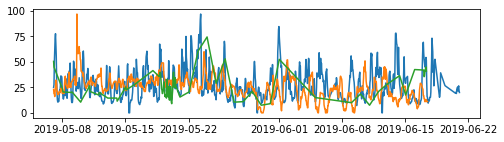

In [45]:
# 새 도시의 NO2 농도 비교
paris = air_quality[air_quality['city'] == "Paris"]
london = air_quality[air_quality['city'] == "London"]
antwerpen= air_quality[air_quality['city'] == "Antwerpen"]



plt.figure(figsize=(8,2))  
plt.plot(paris['date.utc'], paris['value'])
plt.plot(london['date.utc'], london['value'])
plt.plot(antwerpen['date.utc'], antwerpen['value'])

plt.show()

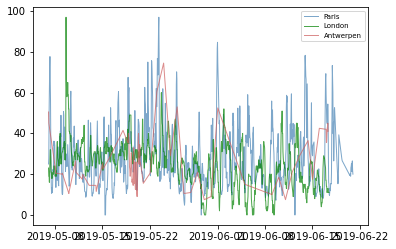

In [58]:
cities = ['Paris', 'London', 'Antwerpen']
colors = ['steelblue', 'green', 'indianred']


for i, city in enumerate(cities) :
    city_data = air_quality[air_quality['city'] == city]
    plt.plot(city_data['date.utc'], city_data['value'], label = city,
            color = colors[i], alpha =  0.7, linewidth = 1)
    
plt.legend(loc = 'upper right', fontsize=7)